<center>
<h1 style="color:red; font-size:70px;"> Esercitazione 4</h1>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations

2025-06-24 11:50:54.001922: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 11:50:54.021316: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-24 11:50:54.080470: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750758654.181444   55654 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750758654.214569   55654 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750758654.311491   55654 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

<h1 style="color: blue; font-size:50px;"> Esercizio 1 - Regression sequential model</h1>

L'obiettivo di questo esercizio consiste nell'effettuare una regressione lineare con un modello sequenziale. Saranno seguiti due approcci differenti, ossia:

- single node

- neural network

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 4.2845 - val_loss: 4.3857
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step - loss: 4.2382 - val_loss: 4.3414
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step - loss: 4.1955 - val_loss: 4.3003
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - loss: 4.1557 - val_loss: 4.2619
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 4.1185 - val_loss: 4.2259
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 4.0836 - val_loss: 4.1918
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step - loss: 4.0506 - val_loss: 4.1596
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 4.0192 - val_loss: 4.1289
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step - loss: 3.9893 - val_loss: 4.0996
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - loss: 3.9607 - val_loss: 4.0714
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 3.9331 - val_loss: 4.0443
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 3.9066

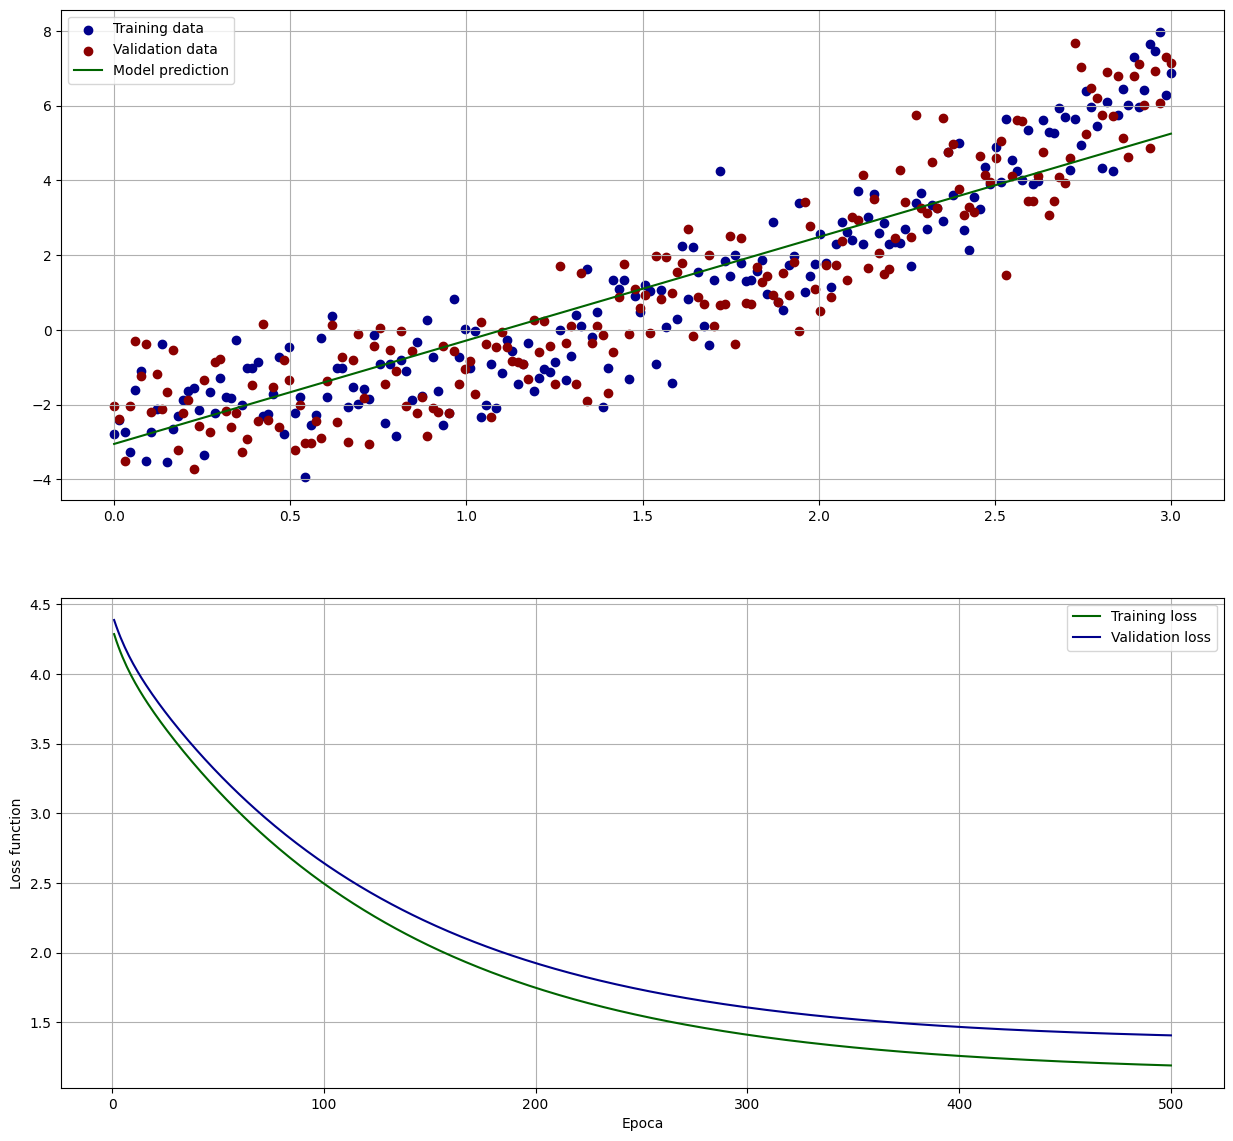

In [28]:
# Importo i dati (che sono già divisi in training e validation set)
data = np.loadtxt("Dati/Esercitazione4/data.dat")
xtr = data[:, 0].reshape(-1, 1)
ytr = data[:, 1].reshape(-1, 1)
xval = data[:, 2].reshape(-1, 1)
yval = data[:, 3].reshape(-1, 1)


# Sono interessato a studiare le capacità predittive di un singolo neurone e per questo motivo
# considero un modello caratterizzato da un solo layer Dense dotato di un singolo nodo. Il passo 
# successivo consiste nel compilare il modello e addestrare la rete.
model = keras.Sequential()
model.add(keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
# Specifico parametri allenamento. Ogni ciclo viene allenato con l'intero dataset di training e sono forniti anche 
# i dati x e y per la validation e quindi lo studio delle caratteristiche predittive del modello
model.fit(tf.Variable(xtr), tf.Variable(ytr), batch_size=len(xtr), epochs = 500, validation_data=(xval, yval))


# Stampo training dataset, validation dataset e predizione del modello. Quello che osserviamo
# è una descrizione non accurata dell'andamento, poichè il singolo nodo ha una capacità rappresentativa 
# lineare, mentre l'andamento da catturare sembra essere quadratico o comunque polinomiale con grado 
# diverso da uno. Riporto in un secondo grafico training e validation loss.
fig, ax = plt.subplots(2, 1, figsize = (15, 14))

ax[0].scatter(xtr, ytr, color = 'darkblue', label = "Training data")
ax[0].scatter(xval, yval, color = 'darkred', label = "Validation data")
ax[0].plot(xval, model.predict(xval), color = 'darkgreen', label = "Model prediction")

ax[1].plot(np.linspace(1, 500, 500), model.history.history['loss'], color = 'darkgreen', label = 'Training loss')
ax[1].plot(np.linspace(1, 500, 500), model.history.history['val_loss'], color = 'darkblue', label = 'Validation loss')
ax[1].set_ylabel("Loss function")
ax[1].set_xlabel("Epoca")

ax[0].legend(loc = "best")
ax[1].legend(loc = "best")
ax[0].grid(True)
ax[1].grid(True)
plt.show()

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - loss: 8.7058 - val_loss: 8.5533
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step - loss: 8.5795 - val_loss: 8.4308
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - loss: 8.4541 - val_loss: 8.3057
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 8.3263 - val_loss: 8.1736
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 8.1914 - val_loss: 8.0381
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - loss: 8.0527 - val_loss: 7.9070
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step - loss: 7.9183 - val_loss: 7.7717
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step - loss: 7.7797 - val_loss: 7.6314
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - loss: 7.6357 - val_loss: 7.4854
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 507ms/step - loss: 7.4857 - val_loss: 7.3332
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step - loss: 7.3292 - val_loss: 7.1744
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - loss: 7.1658 - 

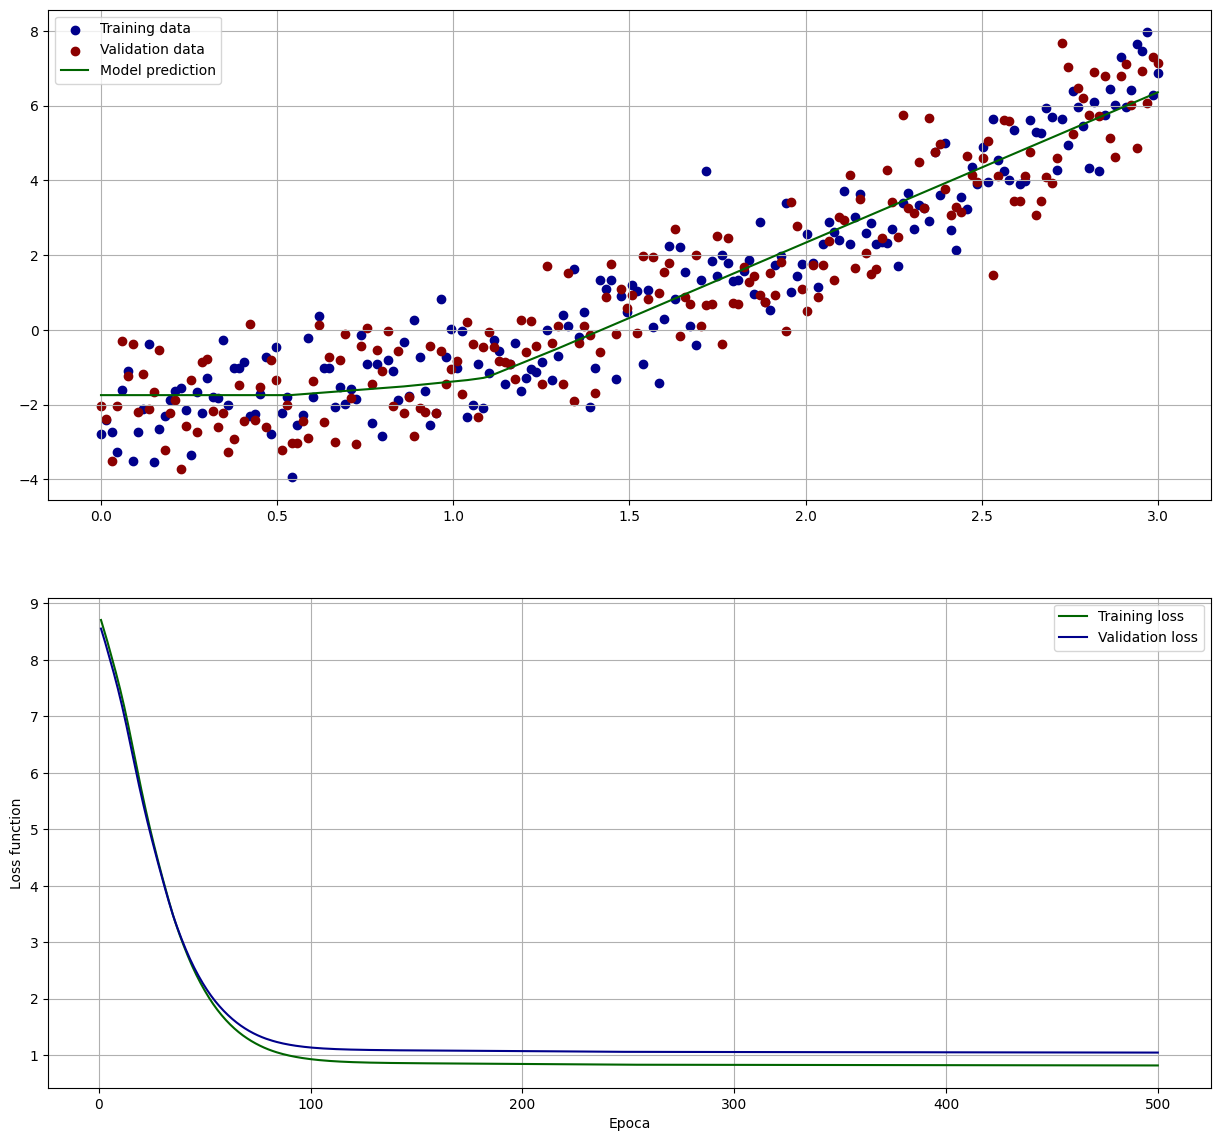

In [31]:
# Svolgo lo stesso esercizio di fitting precedente, ma con un modello più articolato, dotato di 3 layers da 10 nodi ciascuno 
# dotati di funzione d'attivazione relu e con un ultimo strato lineare. In questo caso, data la complessità del modello, dovremmo 
# dopo un certo numero di epoche andare in overfitting
data = np.loadtxt("Dati/Esercitazione4/data.dat")
xtr = data[:, 0].reshape(-1, 1)
ytr = data[:, 1].reshape(-1, 1)
xval = data[:, 2].reshape(-1, 1)
yval = data[:, 3].reshape(-1, 1)

# Costruzione del modello
model = keras.Sequential()
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(10, activation=activations.relu))
model.add(keras.layers.Dense(1))

# Compilazione ed allenamento
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss='mse')
model.fit(tf.Variable(xtr), tf.Variable(ytr), batch_size=len(xtr), epochs = 500, validation_data=(xval, yval))


# Stampo training dataset, validation dataset e predizione del modello in un plot e loss function per training
# e validation dataset in un secondo plot.
fig, ax = plt.subplots(2, 1, figsize = (15, 14))

ax[0].scatter(xtr, ytr, color = 'darkblue', label = "Training data")
ax[0].scatter(xval, yval, color = 'darkred', label = "Validation data")
ax[0].plot(xval, model.predict(xval), color = 'darkgreen', label = "Model prediction")

ax[1].plot(np.linspace(1, 500, 500), model.history.history['loss'], color = 'darkgreen', label = 'Training loss')
ax[1].plot(np.linspace(1, 500, 500), model.history.history['val_loss'], color = 'darkblue', label = 'Validation loss')
ax[1].set_ylabel("Loss function")
ax[1].set_xlabel("Epoca")

ax[0].legend(loc = "best")
ax[1].legend(loc = "best")
ax[0].grid(True)
ax[1].grid(True)
plt.show()

<h1 style="color: blue; font-size:50px;"> Esercizio 2 - Classification sequential model</h1>

L'obiettivo di questo esercizio è la risoluzione di un problema di classificazione utilizzando un modello sequenziale implementato in keras.

Dimensioni del training set: (60000, 28, 28)
Dimensioni del validation set: (10000, 28, 28)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

2025-06-24 13:12:02.062679: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1872/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7763 - loss: 0.6417

2025-06-24 13:12:29.165632: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.7764 - loss: 0.6414 - val_accuracy: 0.8416 - val_loss: 0.4510
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8616 - loss: 0.3835 - val_accuracy: 0.8370 - val_loss: 0.4534
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.8728 - loss: 0.3527 - val_accuracy: 0.8641 - val_loss: 0.3762
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 45s 16ms/step - accuracy: 0.8809 - loss: 0.3183 - val_accuracy: 0.8741 - val_loss: 0.3479
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 26ms/step - accuracy: 0.8899 - loss: 0.3007 - val_accuracy: 0.8680 - val_loss: 0.3679


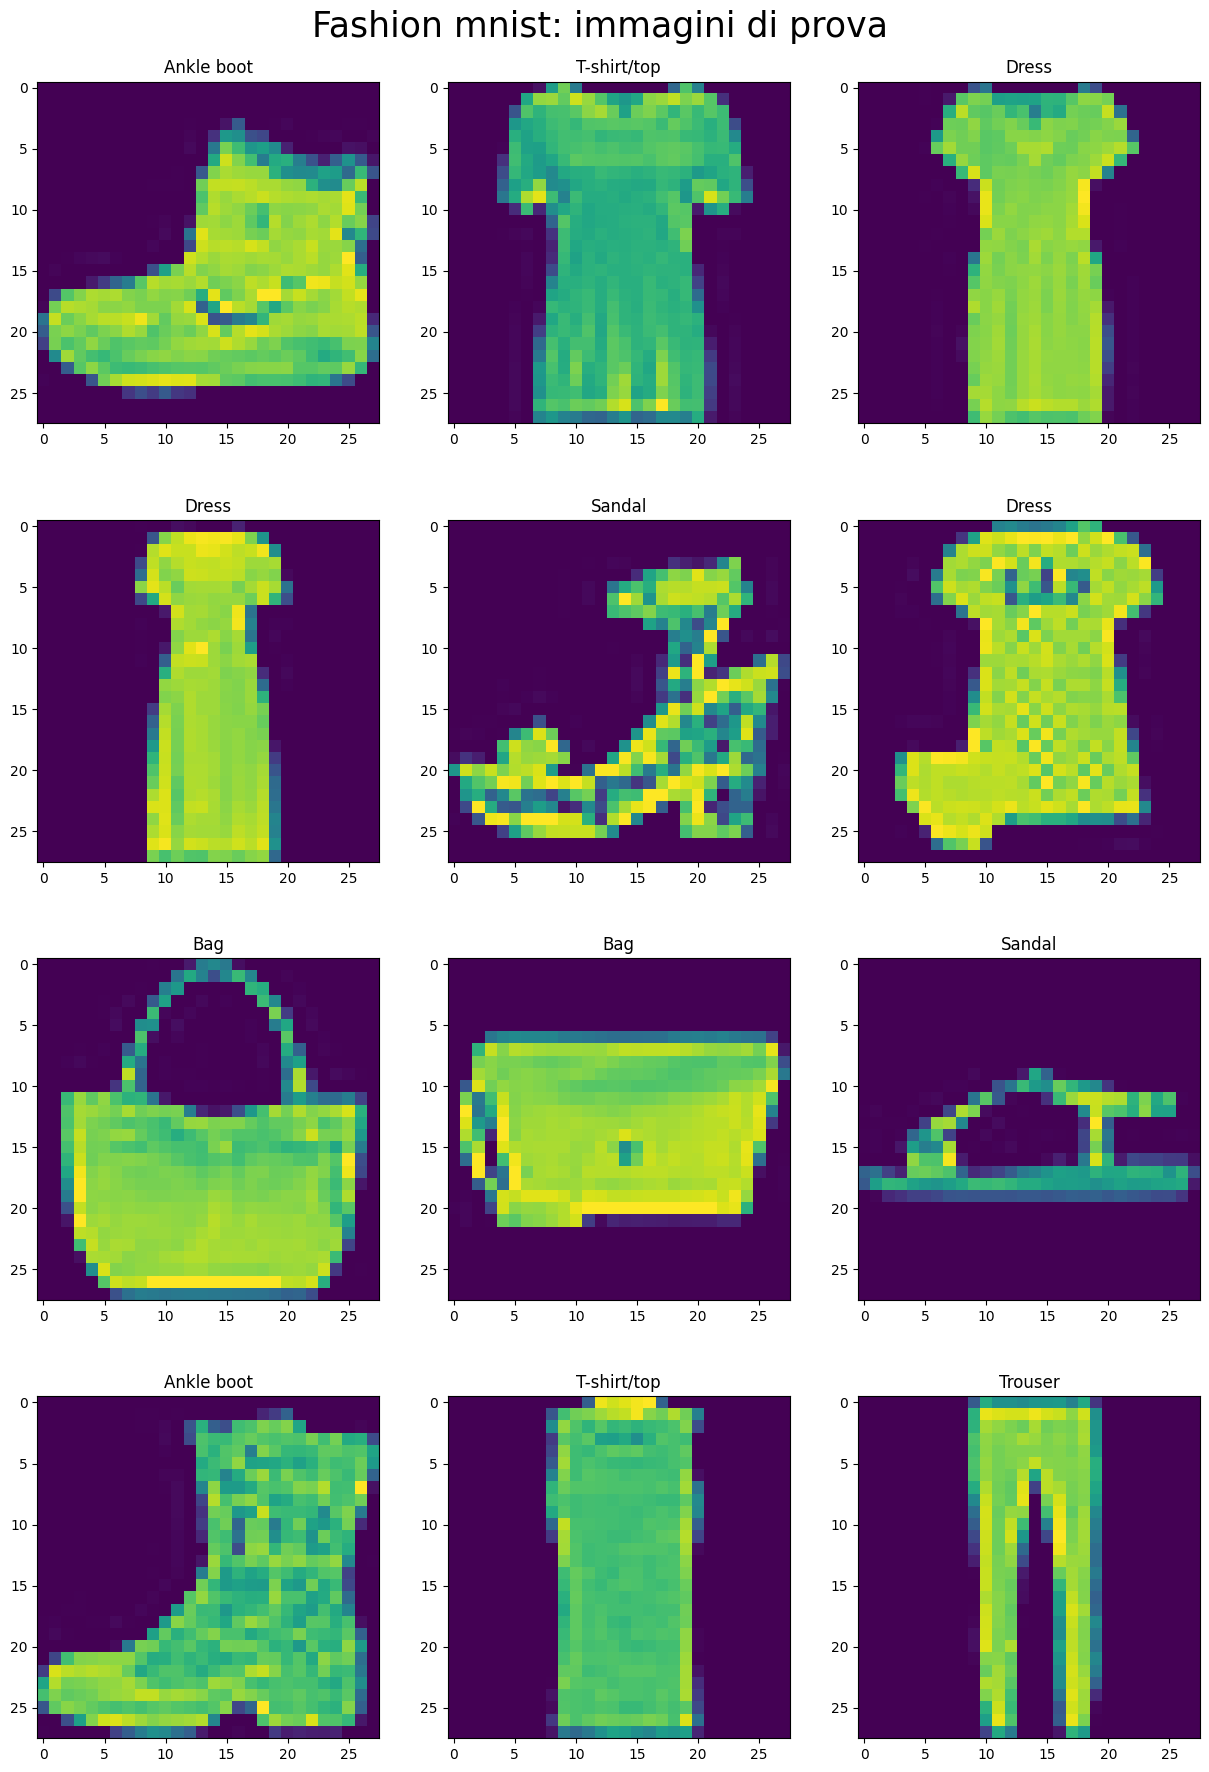

In [18]:
# Ci poniamo di risolvere un problema di classificazione e questo vuol dire che avremo a 
# che fare con delle immagini. In primo luogo dobbiamo caricare il dataset in modo da poterlo
# analizzare. Utilizziamo il dataset fashion_mnist, che possiamo direttamente importare da keras
from keras.datasets import fashion_mnist
# Immagini sono matrici di pixel dimensione (28x28), mentre la label associata è un numero da 0 a 9, 
# dato che le classi di oggetti sono dieci, ciascuna delle quali corrisponde ad un tipico capo di vestiario
(imTr, clTr), (imVal, clVal) = fashion_mnist.load_data()
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("Dimensioni del training set:", imTr.shape)
print("Dimensioni del validation set:", imVal.shape)

# Normalizzo immagini per avere pixel al massimo unitari
imTr = imTr/imTr.max()
imVal = imVal/imVal.max()


# Creo il modello sequenziale. Come primo strato utilizzo un layer di flattening
# in modo tale da lavorare con immagini rappresentate vettorialmente e non più
# matricialmente. Ad esso seguiranno due layer densi (dotati di funzioni d'attivazione
# differenti). Il numero di nodi finali, ossia quelli di output, sarà pari a 10, identico al
# numero di tipologie di capi di vestiario. La funzione d'attivazione di questi ultimi sarà
# softmax, che consente di tradurre gli output numerici in probabilità, consentendo di fatto la 
# classificazione multiclasse
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))               # Va specificata dimensione immagine in layer flattening
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()     # Stampo riassunto struttura del modello


# Compilazione ed allenamento. Specifico accuracy come paramatro da monitorare perchè
# mi consente di valutare le capacità predittive della mia rete neurale
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(imTr, clTr, epochs = 5, validation_data=(imVal, clVal))

# Stampa delle immagini di prova
fig, ax = plt.subplots(4, 3, figsize = (15, 20))
for i in range(0, 4):
    for j in range(0, 3):
        ax[i][j].imshow(imTr[50*i+10*j])
        ax[i][j].set_title(classes[clTr[50*i+10*j]])

fig.suptitle("Fashion mnist: immagini di prova", fontsize = 25)
plt.subplots_adjust(top=0.95)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


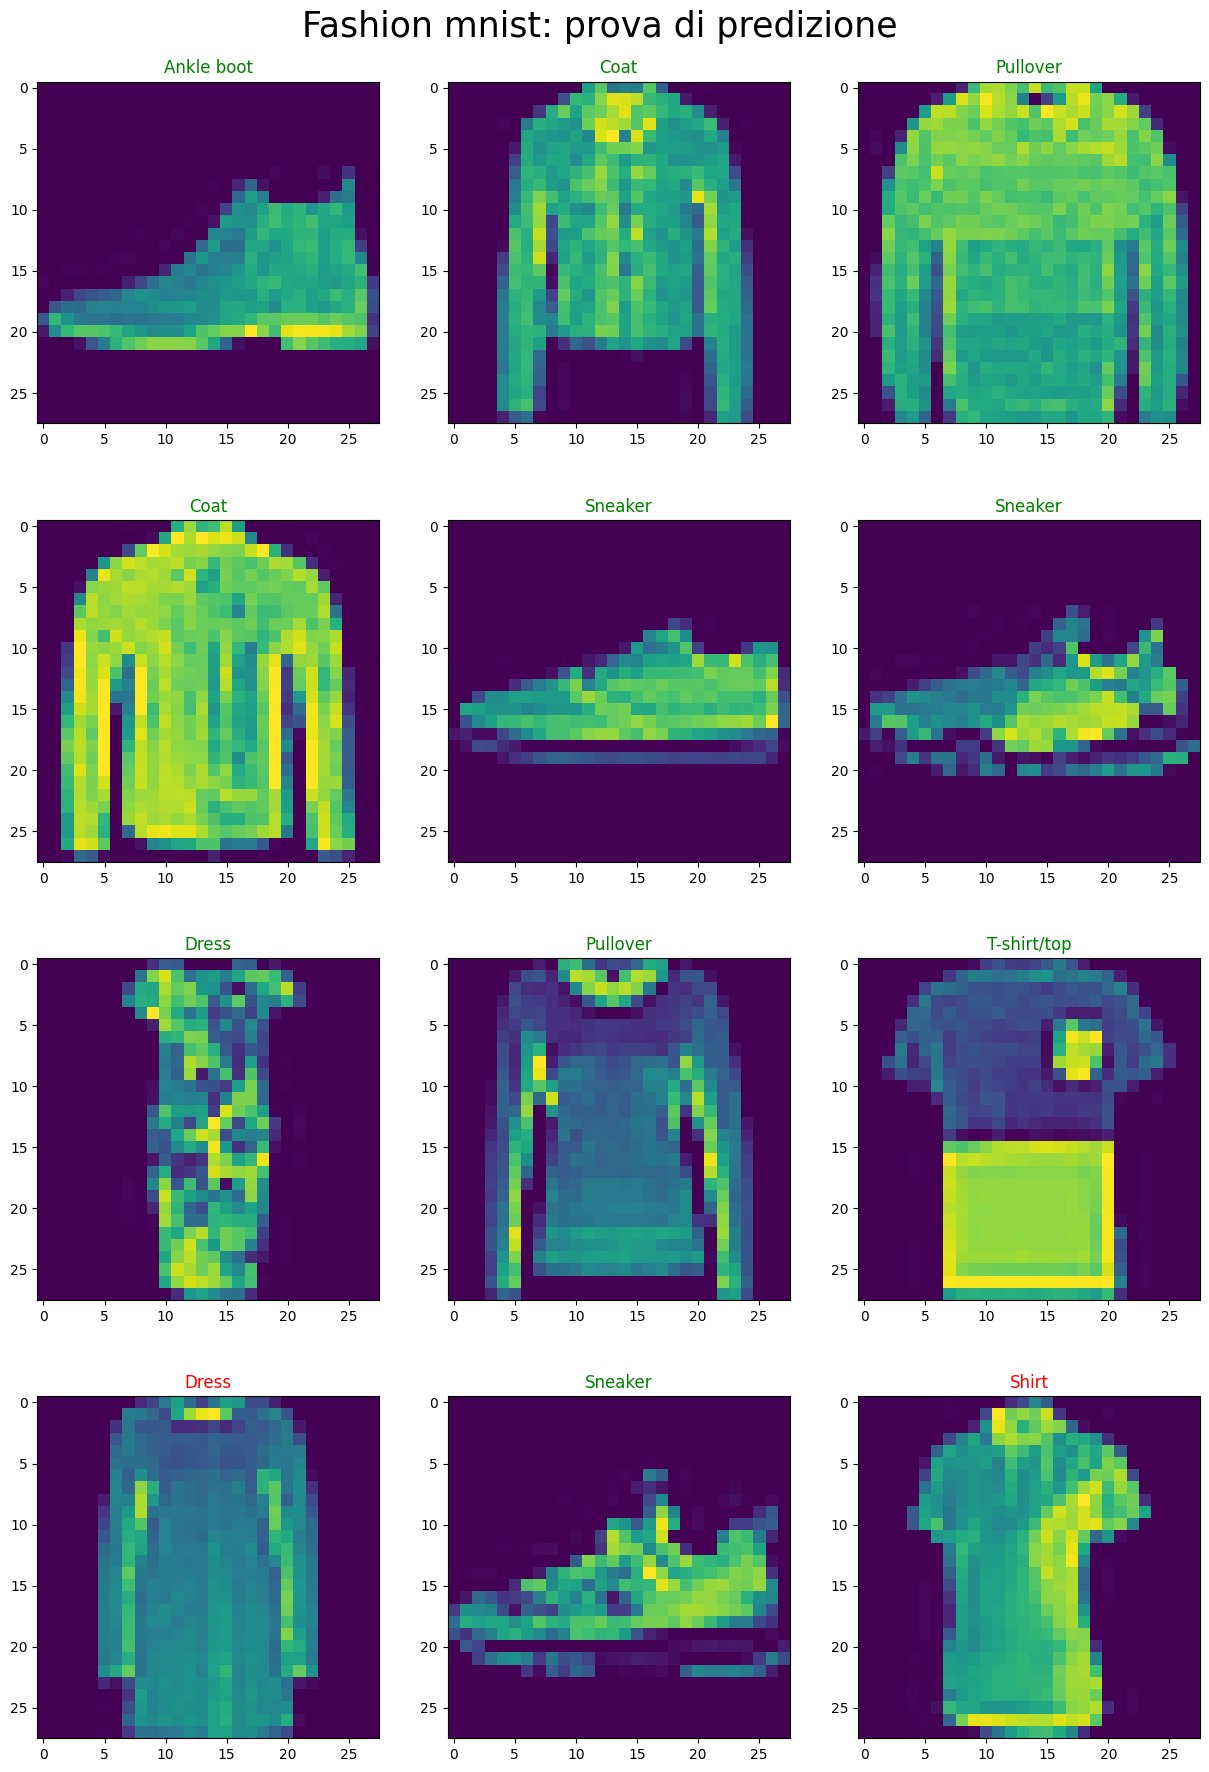

In [24]:
# Stampa di alcune predizioni
fig1, ax1 = plt.subplots(4, 3, figsize = (15, 20))
for i in range(0, 4):
    for j in range(0, 3):
        ax1[i][j].imshow(imVal[50*i+10*j])
        pred = np.argmax(model.predict(np.expand_dims(imVal[50*i+10*j], axis=0)))

        color = 'green'
        if pred != clVal[50*i+10*j]:
            color = 'red'
        ax1[i][j].set_title(classes[pred], color = color)

fig1.suptitle("Fashion mnist: prova di predizione", fontsize = 25)
plt.subplots_adjust(top=0.95)
plt.show()

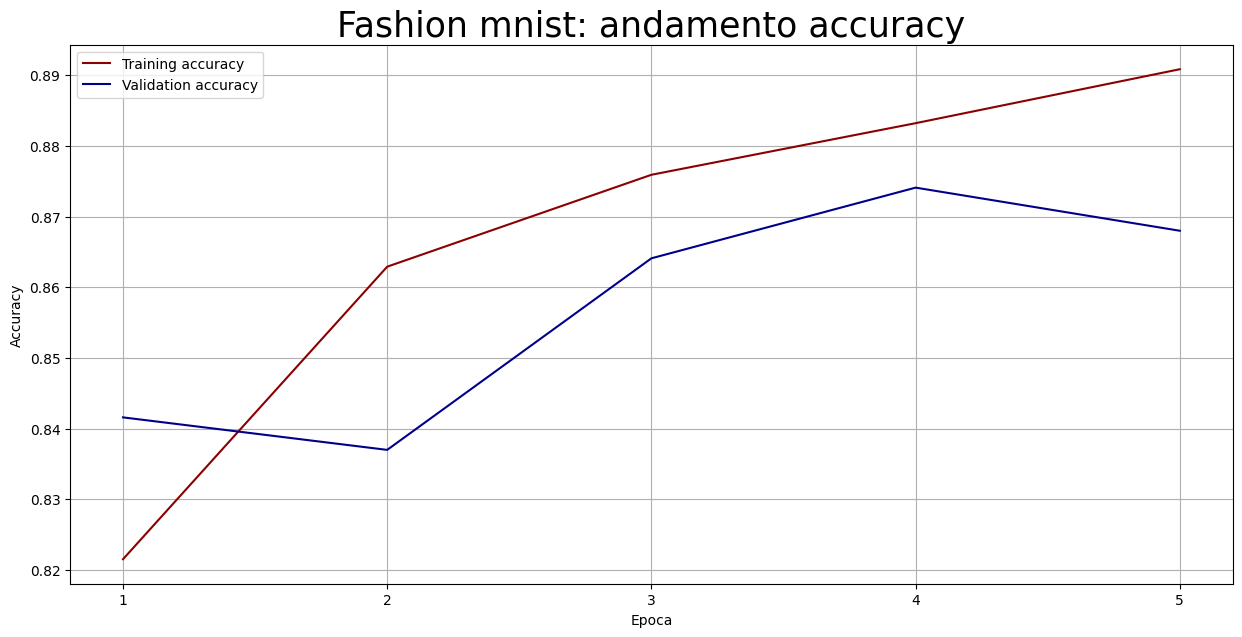

In [26]:
# Studio l'andamento dell'accuracy
fig2 = plt.figure(figsize = (15, 7))

plt.plot(np.linspace(1, 5, 5), model.history.history['accuracy'], color = 'darkred', label = 'Training accuracy')
plt.plot(np.linspace(1, 5, 5), model.history.history['val_accuracy'], color = 'darkblue', label = 'Validation accuracy')

plt.title("Fashion mnist: andamento accuracy", fontsize = 25)
plt.xticks([1, 2, 3, 4, 5])
plt.ylabel("Accuracy")
plt.xlabel("Epoca")

plt.legend(loc='best')
plt.grid(True)
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57m

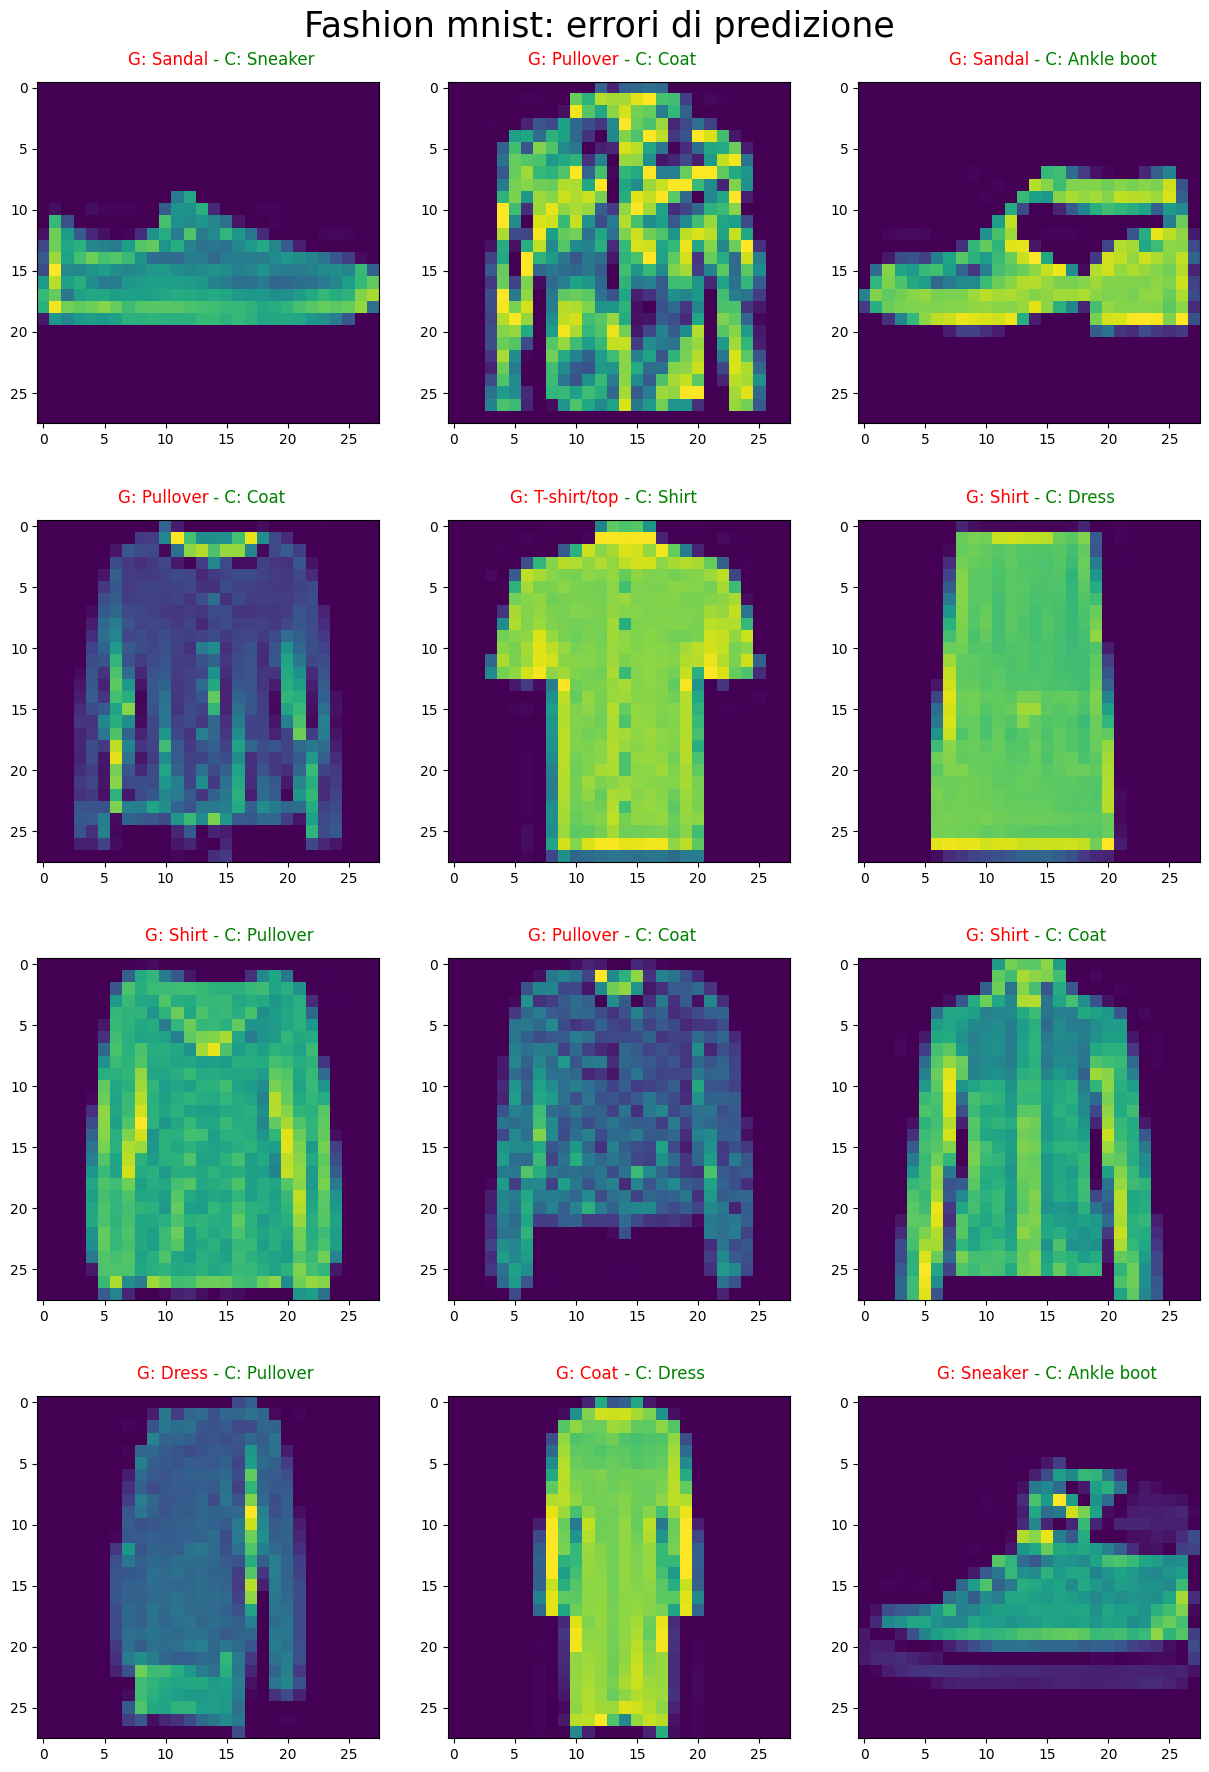

In [32]:
# Esempi di predizioni errate
fig3, ax3 = plt.subplots(4, 3, figsize = (15, 20))

i, j, k = 0, 0, 0
while 3*i+j<12:
    pred = np.argmax(model.predict(np.expand_dims(imVal[k], axis=0)))

    if pred != clVal[k]:
        ax3[i][j].imshow(imVal[k])
        # ax3[i][j].set_title("G: " + classes[pred] + " - C: " + classes[clVal[k]], color = color)
        ax3[i][j].text(
            0.5, 1.05,
            f"G: {classes[pred]}",
            color='red',
            fontsize=12,
            ha='right',
            transform=ax3[i][j].transAxes
        )

        ax3[i][j].text(
            0.5, 1.05,
            f" - C: {classes[clVal[k]]}",
            color='green',
            fontsize=12,
            ha='left',
            transform=ax3[i][j].transAxes
        )
        
        j+=1
        if j == 3:
            j=0
            i+=1
    k+=1

fig3.suptitle("Fashion mnist: errori di predizione", fontsize = 25)
plt.subplots_adjust(top=0.95)
plt.show()